<h1>Table of Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-Prepare-Data" data-toc-modified-id="Load-and-Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load and Prepare Data</a></span></li><li><span><a href="#Time-Series-Plots" data-toc-modified-id="Time-Series-Plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Series Plots</a></span></li></ul></div>

In [1]:
import datetime as dt
import sys
from pathlib import Path

import codebook.EDA as EDA
import codebook.clean as clean
import numpy as np
import pandas as pd
import plotly.express as px
# import plotly.graph_objects as go  # if needed
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
%load_ext autoreload
%autoreload 1

%matplotlib inline
plt.style.use('raph-base')

pio.renderers.default = 'notebook' # online only
pio.templates.default = 'plotly_white'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

np.random.seed(666)

In [3]:
print(sys.executable)
print(sys.version)
print(f'Pandas {pd.__version__}')

W:\conda-environments\py3\python.exe
3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3


## Load and Prepare Data

In [8]:
# Load from parquet file

filename = '3_data_prepared_monthly.parquet'
rel_path = 'data'

data_raw = pd.read_parquet(Path(rel_path) / filename)
data_raw["date"] = pd.to_datetime(data_raw["date"], format="%Y-%m-%d")

In [9]:
data_raw.head(5)
data_raw.info()

,date,cohort,member,value,value_pct
0,2015-01-31,2015,"44,041.00","5,448,126.50",0.48
1,2015-01-31,2016,1.00,1.00,0.00
2,2015-01-31,2017,1.00,1.00,0.00
3,2015-01-31,2018,1.00,1.00,0.00
4,2015-01-31,2019,1.00,1.00,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       497 non-null    datetime64[ns]
 1   cohort     497 non-null    object        
 2   member     497 non-null    float64       
 3   value      497 non-null    float32       
 4   value_pct  497 non-null    float32       
dtypes: datetime64[ns](1), float32(2), float64(1), object(1)
memory usage: 15.7+ KB


In [13]:
# Aggregate the different turnovers to a total per month
df_total = pd.DataFrame(data_raw.groupby("date")["value"].sum())

In [14]:
df_total.head()

,value
date,
2015-01-31,"11,294,810.00"
2015-02-28,"9,093,064.00"
2015-03-31,"10,798,992.00"
2015-04-30,"10,195,118.00"
2015-05-31,"10,959,432.00"


## Time Series Plots

Take note of the special imports:

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

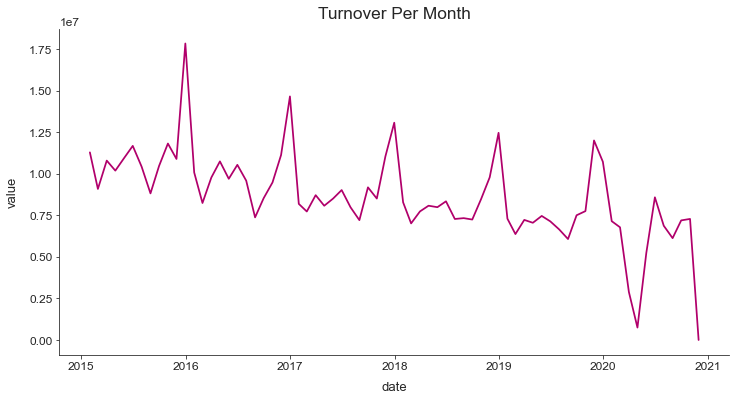

In [16]:
sns.lineplot(
    data=df_total, 
    x=df_total.index, 
    y="value"
).set_title("Turnover Per Month");

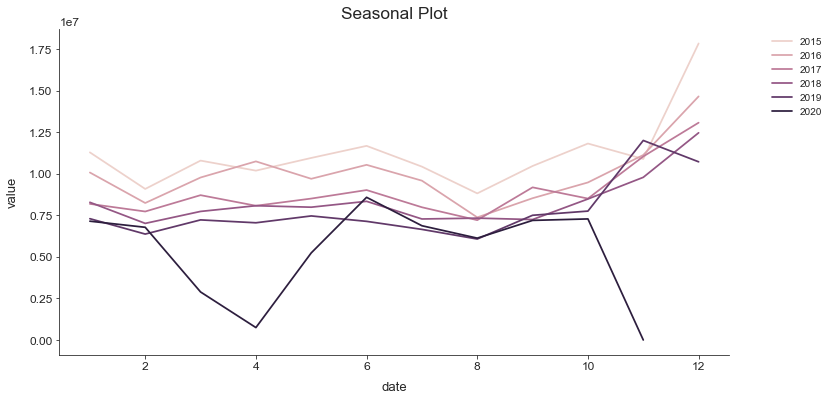

In [20]:
sns.lineplot(
    data=df_total, 
    x=df_total.index.month, 
    y="value",
    hue=df_total.index.year,
    legend="full"
).set_title("Seasonal Plot");


# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

In [28]:
df_total["month"] = df_total.index.month
df_total["month"] = df_total["month"].map(
    {
        1: "Jan",
        2: "Feb",
        3: "Mrz",
        4: "Apr",
        5: "Mai",
        6: "Jun",
        7: "Jul",
        8: "Aug",
        9: "Sep",
        10: "Okt",
        11: "Nov",
        12: "Dez"
    }
)

px.line_polar(
    df_total, 
    r="value", 
    theta=df_total["month"], 
    color=df_total.index.year, 
    line_close=True, 
    color_discrete_sequence= ['#0d0887',  '#7201a8', '#bd3786', '#ed7953',  '#fdca26', '#f0f921'],
    title='Polar seasonal plot',
    width=600, 
    height=500
)

In [24]:
df_total.head()

,value,month
date,,
2015-01-31,"11,294,810.00",1
2015-02-28,"9,093,064.00",2
2015-03-31,"10,798,992.00",3
2015-04-30,"10,195,118.00",4
2015-05-31,"10,959,432.00",5
